In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [5]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('C:/Users/humay/Downloads/weatherAUS.csv')
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


# Basic EDA of Entire Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
df.describe().round(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70


In [9]:
df1 = df.copy()
df1.dropna(axis = 0, inplace = True)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [11]:
categorical_features = list(df1.select_dtypes(include='object').columns)
numerical_features = list(df1.select_dtypes(exclude='object').columns)
df1[categorical_features].isnull().any()

Date            False
Location        False
WindGustDir     False
WindDir9am      False
WindDir3pm      False
RainToday       False
RainTomorrow    False
dtype: bool

# Sydeny EDA

In [12]:
df2 = df1.copy()
df2 = df2[(df2.Location == 'SydneyAirport')]
df2.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
33520,2009-01-01,SydneyAirport,17.7,35.1,0.0,9.8,12.9,S,72.0,NW,NW,15.0,33.0,63.0,13.0,1005.3,1000.2,6.0,6.0,22.9,34.0,No,No
33521,2009-01-02,SydneyAirport,18.5,23.0,0.0,11.0,5.9,S,63.0,SSE,SE,15.0,35.0,63.0,58.0,1012.9,1014.1,5.0,6.0,20.6,20.1,No,No
33523,2009-01-04,SydneyAirport,18.7,27.1,0.0,5.4,11.3,NE,65.0,NNE,NE,24.0,48.0,60.0,51.0,1018.5,1014.9,2.0,1.0,22.9,25.9,No,No
33524,2009-01-05,SydneyAirport,20.2,31.6,0.0,10.0,12.2,NNE,63.0,WNW,NE,11.0,35.0,58.0,52.0,1013.2,1008.0,6.0,3.0,24.9,29.0,No,No
33525,2009-01-06,SydneyAirport,19.9,29.7,0.0,10.0,11.8,NE,41.0,S,E,19.0,20.0,82.0,54.0,1011.7,1007.8,1.0,1.0,22.7,28.7,No,No
33526,2009-01-07,SydneyAirport,20.6,34.9,0.0,9.0,9.3,S,59.0,SSE,NE,15.0,26.0,79.0,52.0,1010.0,1004.7,1.0,7.0,22.3,30.3,No,No
33527,2009-01-08,SydneyAirport,20.2,21.7,0.2,9.8,0.0,SSW,56.0,S,S,33.0,35.0,85.0,78.0,1012.4,1013.6,8.0,8.0,20.7,19.7,No,No
33528,2009-01-09,SydneyAirport,17.4,22.9,0.0,7.6,5.9,SSE,50.0,SSE,SE,30.0,28.0,54.0,44.0,1020.2,1018.8,7.0,5.0,19.4,22.3,No,No
33529,2009-01-10,SydneyAirport,16.3,24.0,0.0,7.6,6.1,ENE,48.0,E,NE,17.0,28.0,49.0,44.0,1017.0,1013.8,7.0,6.0,20.3,23.2,No,No
33530,2009-01-11,SydneyAirport,18.0,26.6,0.0,6.6,8.7,NE,54.0,NNE,NE,24.0,33.0,57.0,48.0,1013.9,1011.3,4.0,1.0,23.1,25.7,No,No


In [13]:
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(df2)

#Saving results to HTML file
sweet_report.show_html('eda_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(-20.0, 0, '(2015, 11)'),
  Text(0.0, 0, '(2009, 1)'),
  Text(20.0, 0, '(2010, 9)'),
  Text(40.0, 0, '(2012, 6)'),
  Text(60.0, 0, '(2014, 4)'),
  Text(80.0, 0, '(2015, 12)'),
  Text(100.0, 0, ''),
  Text(120.0, 0, '')])

<Figure size 1000x800 with 0 Axes>

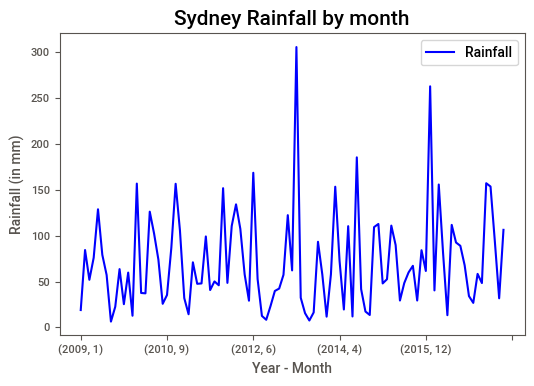

In [14]:
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')
rainfall =[df2['Date'].dt.year, df2['Date'].dt.month, df2['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rainfall_df = pd.concat(rainfall, axis=1, keys=headers)
plt.figure(figsize=(10,8))
p = rainfall_df.groupby(['Year','Month']).agg({'Rainfall':'sum'})
p.plot(kind='line', color='blue')
plt.title('Sydney Rainfall by month', fontsize=15)
plt.xlabel('Year - Month', fontsize=10)
plt.ylabel('Rainfall (in mm)', fontsize=10)
plt.xticks(rotation=0)

In [15]:
sns.set(font_scale=2)

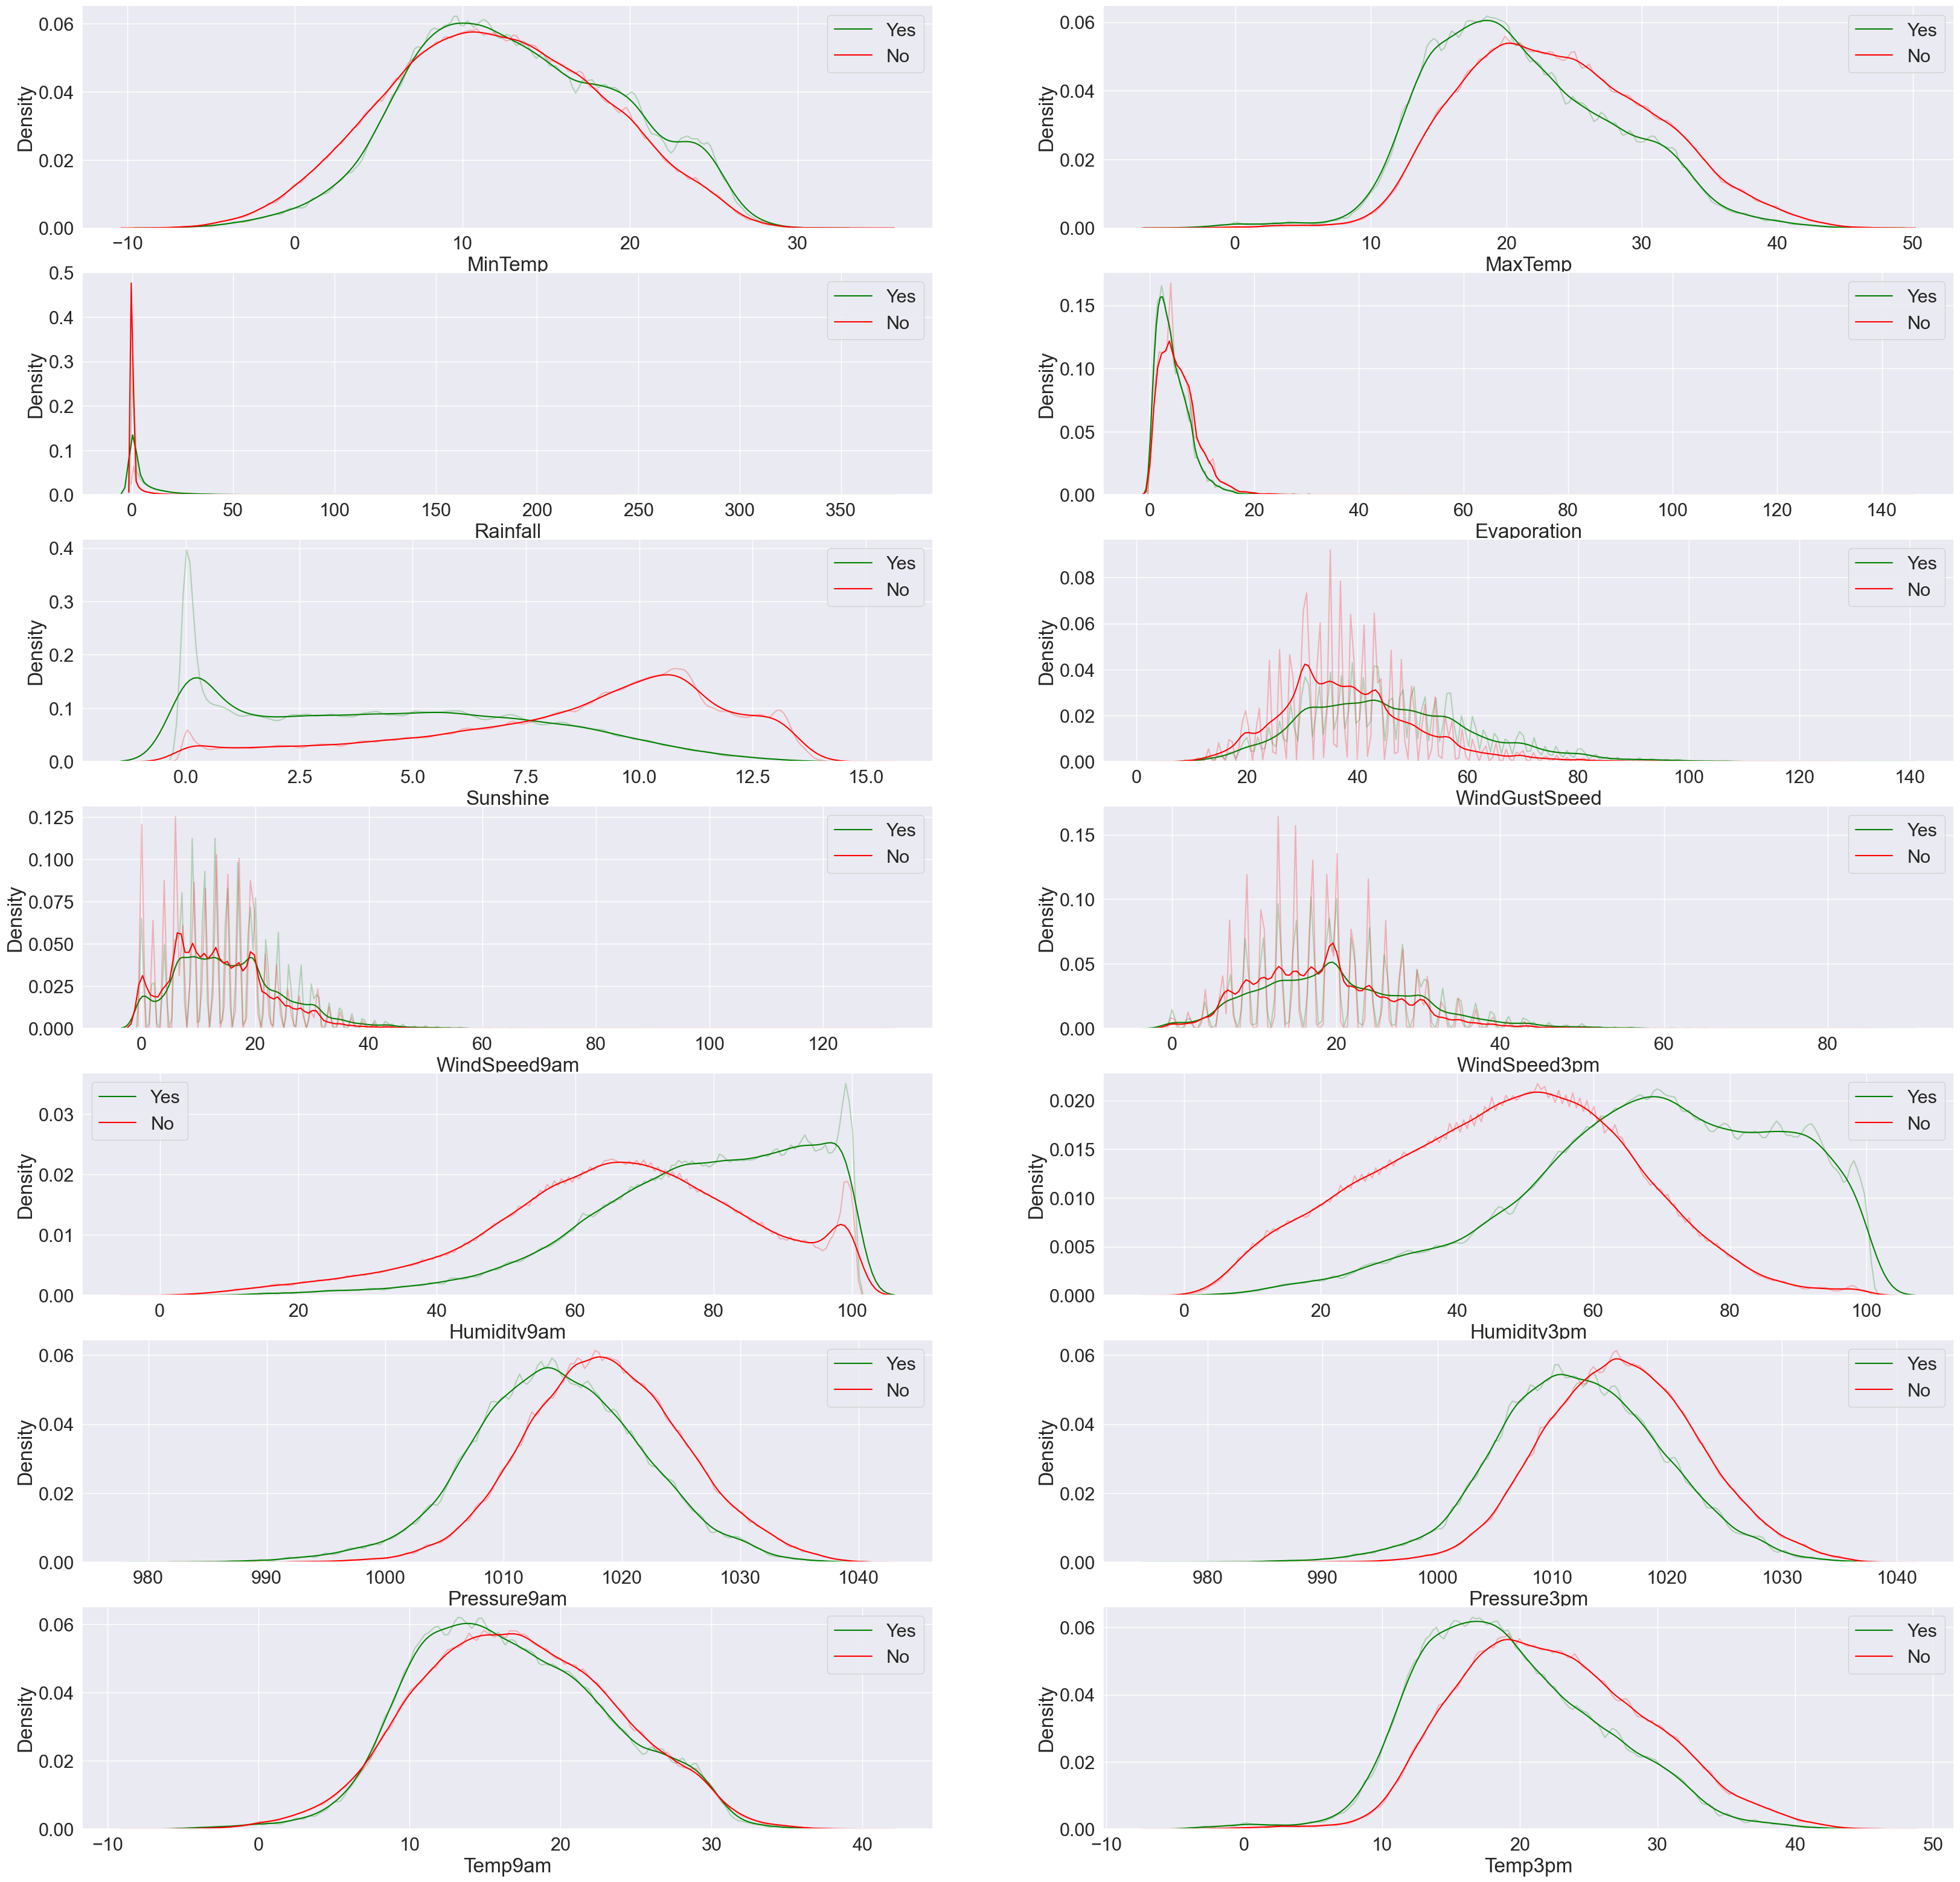

In [16]:
# EDA for continuous features
cont_features = df2[[
    'MinTemp',
    'MaxTemp', 
    'Rainfall', 
    'Evaporation',
    'Sunshine',
    'WindGustSpeed',
    'WindSpeed9am',
    'WindSpeed3pm', 
    'Humidity9am',
    'Humidity3pm',
    'Pressure9am',
    'Pressure3pm',
    'Temp9am',
    'Temp3pm'
]]
row_count = 7
col_count = 2
_, axes = plt.subplots(row_count,col_count, figsize=(40,40))
for i, col in enumerate(cont_features.columns):
    row_i = i // col_count
    col_i = i % col_count
    
    sns.kdeplot(df[col][df['RainTomorrow'] == 'Yes'], bw_adjust=0.25, 
                ax=axes[row_i, col_i], color='green', alpha=0.25)
    sns.kdeplot(df[col][df['RainTomorrow'] == 'Yes'],
                ax=axes[row_i, col_i], color='green', label='Yes')
    
    sns.kdeplot(df[col][df['RainTomorrow'] == 'No'], bw_adjust=0.25, 
                ax=axes[row_i, col_i], color='red',  alpha=0.25)
    sns.kdeplot(df[col][df['RainTomorrow'] == 'No'], 
                ax=axes[row_i, col_i], color='red',  label='No')
    
    axes[row_i, col_i].legend()
    
plt.show()

C:\Users\humay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\humay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\humay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\humay\anaconda3\lib\si

<AxesSubplot:xlabel='Cloud3pm', ylabel='count'>

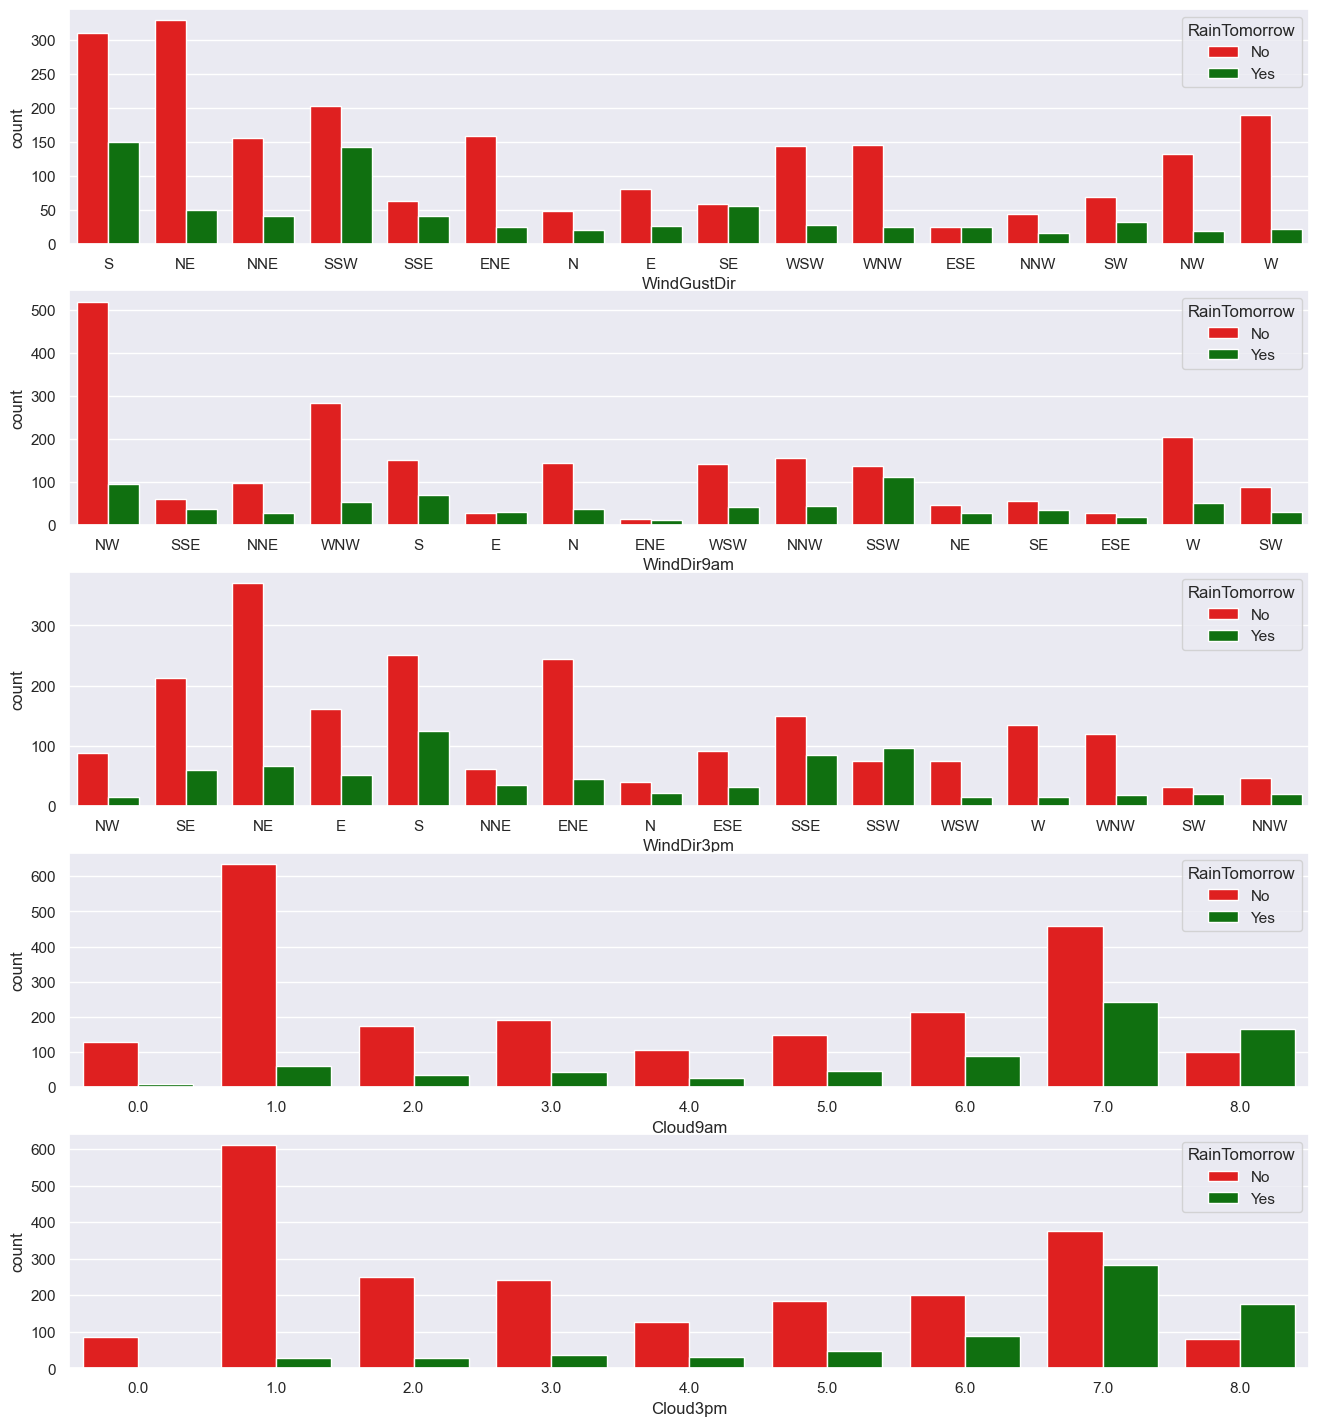

In [34]:
cat_features = df2[[
    'RainTomorrow',
    'WindGustDir',
    'WindDir9am',
    'WindDir3pm',
    'Cloud9am',
    'Cloud3pm',
]]
fig, ax = plt.subplots(5, 1, figsize=(16,18))
sns.set_style("whitegrid")  
sns.set(font_scale=1)
# WindGustDir
sns.countplot(cat_features['WindGustDir'], hue=cat_features['RainTomorrow'],palette=['Red','Green'], ax=ax[0])
#ax[0].set_title("Wind Gust Direction", fontsize=10)

# WindDir9am
sns.countplot(cat_features['WindDir9am'], hue=cat_features['RainTomorrow'],palette=['Red','Green'], ax=ax[1])
#ax[1].set_title("Wind Direction at 9AM", fontsize=10)

# WindDir3pm
sns.countplot(cat_features['WindDir3pm'], hue=cat_features['RainTomorrow'],palette=['Red','Green'], ax=ax[2])
#ax[2].set_title("Wind Direction at 3PM", fontsize=10)

# Cloud9am
sns.countplot(cat_features['Cloud9am'], hue=cat_features['RainTomorrow'],palette=['Red','Green'], ax=ax[3])
#ax[3].set_title("Wind Direction at 3PM", fontsize=10)

# Cloud3pm
sns.countplot(cat_features['Cloud3pm'], hue=cat_features['RainTomorrow'],palette=['Red','Green'], ax=ax[4])
#ax[4].set_title("Wind Direction at 3PM", fontsize=10)


<AxesSubplot:>

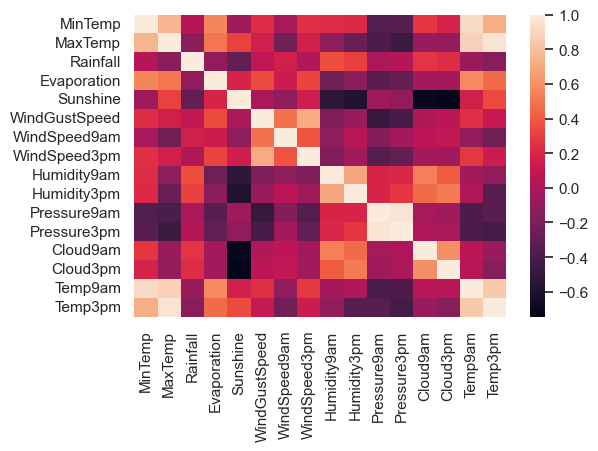

In [35]:
import seaborn as sns
corr = df2.corr()
sns.heatmap(corr)

Text(0.5, 1.0, 'Rain Today vs Rain Tomorrow')

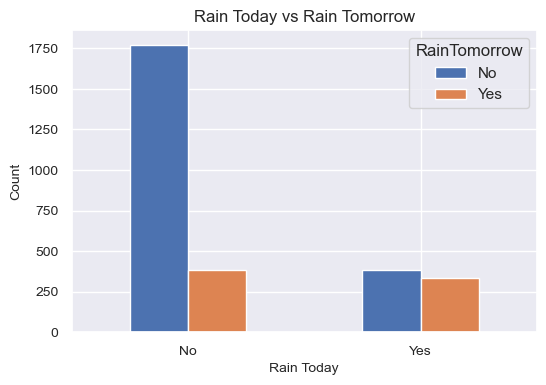

In [36]:
relation_plot = pd.crosstab(df2['RainToday'], df2['RainTomorrow'])
plt.rcParams["figure.figsize"] = (6,4)
relation_plot.plot(kind='bar',stacked=False)
plt.xlabel('Rain Today', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Rain Today vs Rain Tomorrow', fontsize=12)

# Feature Engineering

To check whether the dataset is imbalanced or balanced. 
If the dataset is imbalanced, we need to undersample majority or oversample minority to balance it.

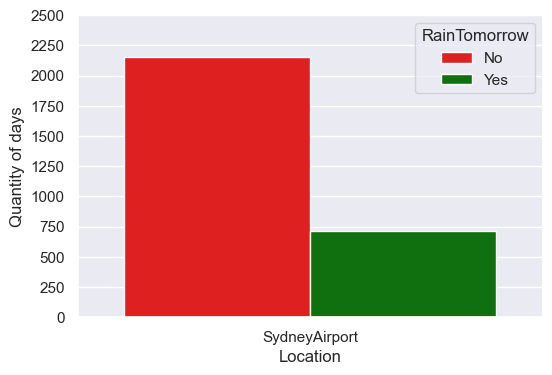

In [37]:
#Imbalance data
df3=df1.copy()
df3 = df3[(df3.Location == 'SydneyAirport')]
plt.figure(figsize = (6,4))
sns.countplot(x = df3.Location, hue = df3.RainTomorrow, palette = ['Red', 'Green'])
plt.ylabel('Quantity of days')
plt.yticks(np.linspace(0, 2500, 11))
plt.show()

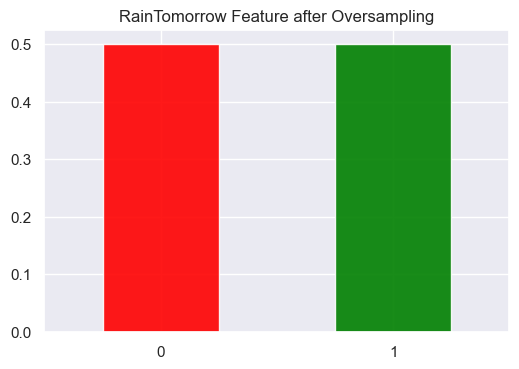

<Figure size 600x400 with 0 Axes>

In [38]:
from sklearn.utils import resample
df3['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df3['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
no = df3[df3.RainTomorrow == 0]
yes = df3[df3.RainTomorrow == 1]
oversampled = resample(yes, replace=True, n_samples=len(no), random_state=987)
df4 = pd.concat([no, oversampled])
df4.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['red','green'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Feature after Oversampling')
fig = plt.figure(figsize = (6,4))
plt.show()

In [39]:
df4.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [40]:
df4['Date'] = df4['Date'].fillna(df4['Date'].mode()[0])
df4['WindGustDir'] = df4['WindGustDir'].fillna(df4['WindGustDir'].mode()[0])
df4['WindDir9am'] = df4['WindDir9am'].fillna(df4['WindDir9am'].mode()[0])
df4['WindDir3pm'] = df4['WindDir3pm'].fillna(df4['WindDir3pm'].mode()[0])

In [41]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df4.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df4[col] = lencoders[col].fit_transform(df4[col])

In [42]:
df4.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
33520,0,0,17.7,35.1,0.0,9.8,12.9,8,72.0,7,7,15.0,33.0,63.0,13.0,1005.3,1000.2,6.0,6.0,22.9,34.0,0,0
33521,1,0,18.5,23.0,0.0,11.0,5.9,8,63.0,10,9,15.0,35.0,63.0,58.0,1012.9,1014.1,5.0,6.0,20.6,20.1,0,0
33523,2,0,18.7,27.1,0.0,5.4,11.3,4,65.0,5,4,24.0,48.0,60.0,51.0,1018.5,1014.9,2.0,1.0,22.9,25.9,0,0
33524,3,0,20.2,31.6,0.0,10.0,12.2,5,63.0,14,4,11.0,35.0,58.0,52.0,1013.2,1008.0,6.0,3.0,24.9,29.0,0,0
33525,4,0,19.9,29.7,0.0,10.0,11.8,4,41.0,8,0,19.0,20.0,82.0,54.0,1011.7,1007.8,1.0,1.0,22.7,28.7,0,0


In [43]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df5 = df4.copy(deep=True) 
mice_imputer = IterativeImputer()
df5.iloc[:, :] = mice_imputer.fit_transform(df4)

In [44]:
df5.head()
df5.shape

(4310, 23)

In [45]:
df5.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
33520,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33521,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33523,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33524,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33525,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35632,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36011,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35914,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
34498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
Q1 = df5.quantile(0.25)
Q3 = df5.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1427.75
Location            0.00
MinTemp             7.60
MaxTemp             7.10
Rainfall            2.80
Evaporation         4.00
Sunshine            7.30
WindGustDir         6.00
WindGustSpeed      20.00
WindDir9am          6.00
WindDir3pm          6.00
WindSpeed9am       11.00
WindSpeed3pm       12.00
Humidity9am        23.00
Humidity3pm        27.00
Pressure9am         9.40
Pressure3pm         9.60
Cloud9am            5.00
Cloud3pm            5.00
Temp9am             6.80
Temp3pm             6.70
RainToday           1.00
RainTomorrow        1.00
dtype: float64


In [47]:
df5 = df5[~((df5 < (Q1 - 1.5 * IQR)) |(df5 > (Q3 + 1.5 * IQR))).any(axis=1)]
df5.shape

(3359, 23)

In [48]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df5)
df6 = pd.DataFrame(scaler.transform(df5), index=df5.index, columns=df5.columns)
df6.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
33520,0.000000,0.0,0.662100,0.932540,0.0,0.765625,0.948529,0.533333,0.779412,0.466667,0.466667,0.351351,0.659091,0.533333,0.075269,0.129834,0.064171,0.750,0.750,0.684685,0.987500,0.0,0.0
33521,0.000353,0.0,0.698630,0.452381,0.0,0.859375,0.433824,0.533333,0.647059,0.666667,0.600000,0.351351,0.704545,0.533333,0.559140,0.339779,0.435829,0.625,0.750,0.581081,0.408333,0.0,0.0
33523,0.000706,0.0,0.707763,0.615079,0.0,0.421875,0.830882,0.266667,0.676471,0.333333,0.266667,0.594595,1.000000,0.493333,0.483871,0.494475,0.457219,0.250,0.125,0.684685,0.650000,0.0,0.0
33524,0.001060,0.0,0.776256,0.793651,0.0,0.781250,0.897059,0.333333,0.647059,0.933333,0.266667,0.243243,0.704545,0.466667,0.494624,0.348066,0.272727,0.750,0.375,0.774775,0.779167,0.0,0.0
33525,0.001413,0.0,0.762557,0.718254,0.0,0.781250,0.867647,0.266667,0.323529,0.533333,0.000000,0.459459,0.363636,0.786667,0.516129,0.306630,0.267380,0.125,0.125,0.675676,0.766667,0.0,0.0


## Modelling

In [49]:
df6.drop('Location', axis = 1, inplace = True)
X_s = df6.drop('RainTomorrow', axis = 1)
y_s = df6['RainTomorrow']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2, random_state=654)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [60]:
def roc_curve_plot(fper, tper):  
    plt.plot(fper, tper, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='-')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [72]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix, roc_curve, classification_report
def model_boilerplate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    
    print("Accuracy = {}".format(accuracy))
    print("AUC = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    roc_curve_plot(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Greens)
    
    return model, accuracy, roc_auc, coh_kap

Accuracy = 0.7202380952380952
AUC = 0.7116683771362278
Cohen's Kappa = 0.42888657836445
              precision    recall  f1-score   support

         0.0    0.71325   0.81096   0.75897       365
         1.0    0.73152   0.61238   0.66667       307

    accuracy                        0.72024       672
   macro avg    0.72239   0.71167   0.71282       672
weighted avg    0.72160   0.72024   0.71680       672



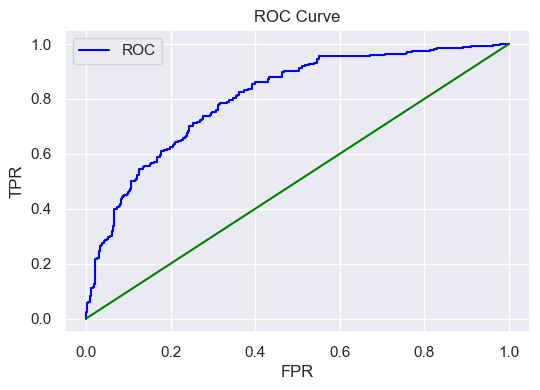

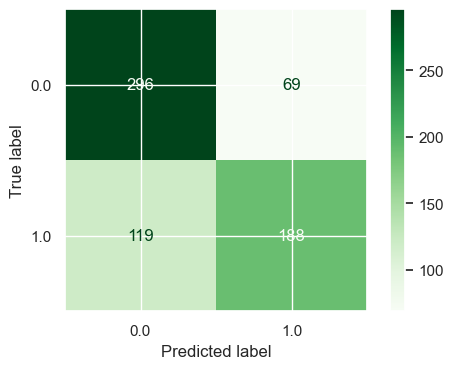

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis()
model_lda, accuracy_lr, roc_auc_lr, coh_kap_lr = model_boilerplate(model_lda, X_train, y_train, X_test, y_test)

Accuracy = 0.7351190476190477
AUC = 0.7276962206059523
Cohen's Kappa = 0.4603967989028934
              precision    recall  f1-score   support

         0.0    0.72973   0.81370   0.76943       365
         1.0    0.74340   0.64169   0.68881       307

    accuracy                        0.73512       672
   macro avg    0.73656   0.72770   0.72912       672
weighted avg    0.73597   0.73512   0.73260       672



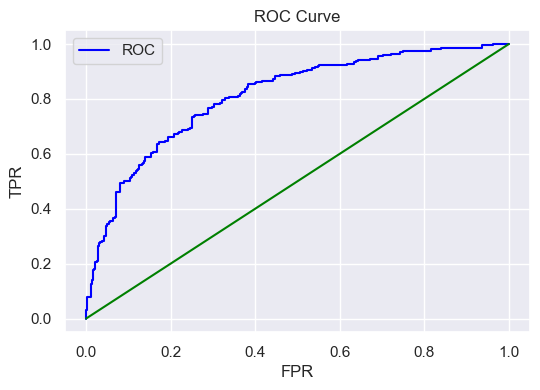

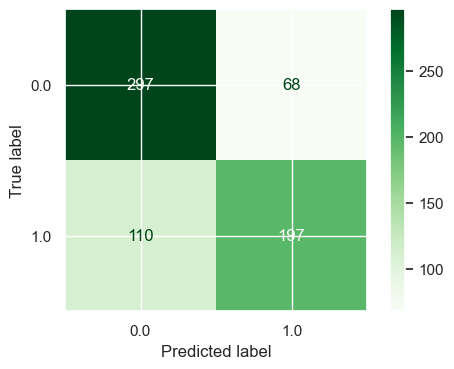

In [74]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model_qda = QuadraticDiscriminantAnalysis()
model_qda, accuracy_lr, roc_auc_lr, coh_kap_lr = model_boilerplate(model_qda, X_train, y_train, X_test, y_test)

Accuracy = 0.7261904761904762
AUC = 0.7181830351166837
Cohen's Kappa = 0.4416235402498171
              precision    recall  f1-score   support

         0.0    0.72019   0.81096   0.76289       365
         1.0    0.73563   0.62541   0.67606       307

    accuracy                        0.72619       672
   macro avg    0.72791   0.71818   0.71947       672
weighted avg    0.72725   0.72619   0.72322       672



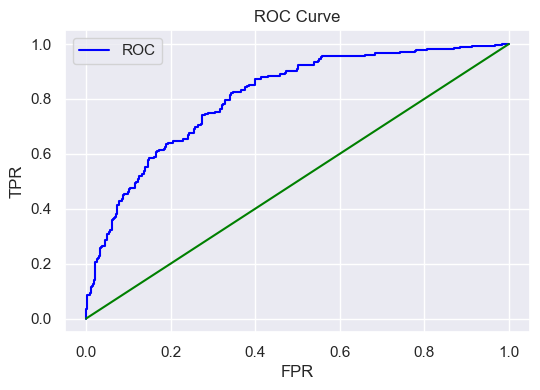

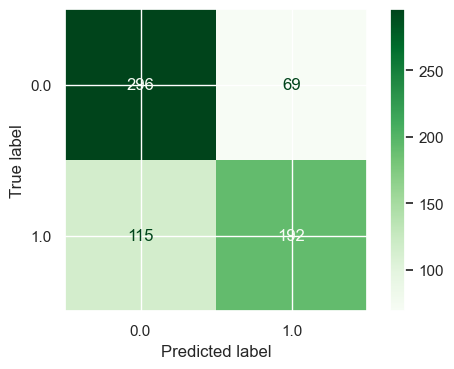

In [75]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(penalty = 'l1', solver = 'liblinear')
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr = model_boilerplate(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8214285714285714
AUC = 0.8203471509526572
Cohen's Kappa = 0.6403628481978004
              precision    recall  f1-score   support

         0.0    0.83747   0.83288   0.83516       365
         1.0    0.80259   0.80782   0.80519       307

    accuracy                        0.82143       672
   macro avg    0.82003   0.82035   0.82018       672
weighted avg    0.82153   0.82143   0.82147       672



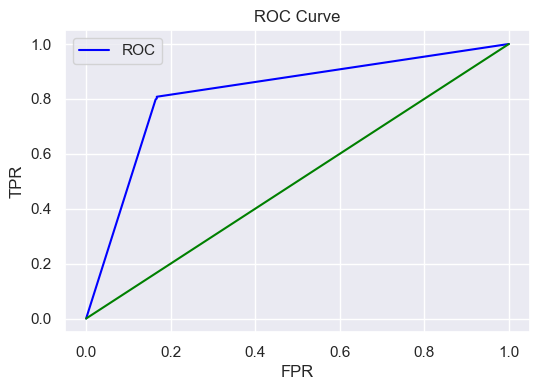

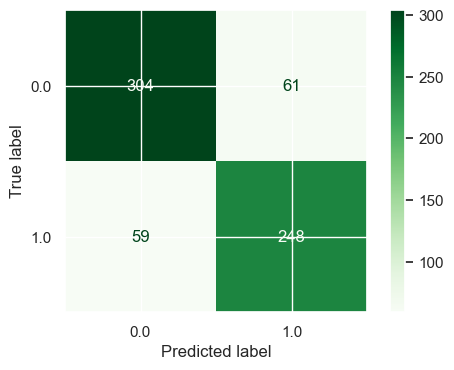

In [76]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth = 16, max_features = "sqrt")
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt = model_boilerplate(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8988095238095238
AUC = 0.8993440721074473
Cohen's Kappa = 0.7966264631269749
              precision    recall  f1-score   support

         0.0    0.91831   0.89315   0.90556       365
         1.0    0.87697   0.90554   0.89103       307

    accuracy                        0.89881       672
   macro avg    0.89764   0.89934   0.89829       672
weighted avg    0.89942   0.89881   0.89892       672



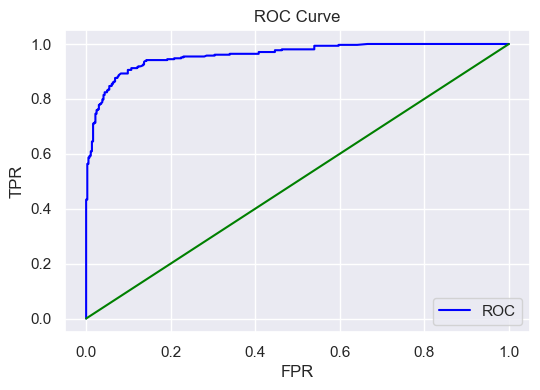

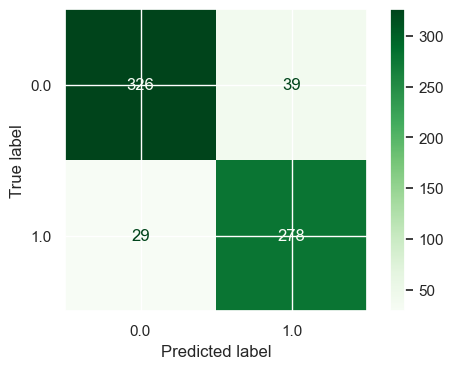

In [78]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth = 16, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100, random_state = 12345)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf = model_boilerplate(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.8080357142857143
AUC = 0.8075007808665386
Cohen's Kappa = 0.6138894332697893
              precision    recall  f1-score   support

         0.0    0.82961   0.81370   0.82158       365
         1.0    0.78344   0.80130   0.79227       307

    accuracy                        0.80804       672
   macro avg    0.80652   0.80750   0.80692       672
weighted avg    0.80852   0.80804   0.80819       672



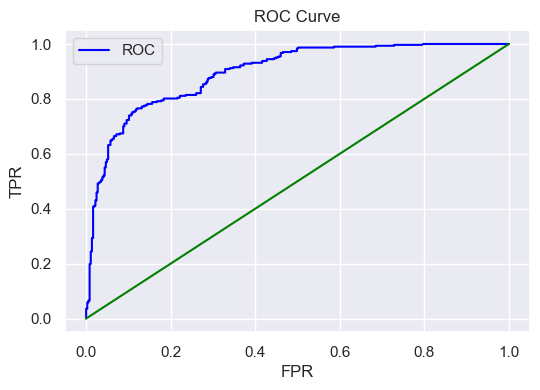

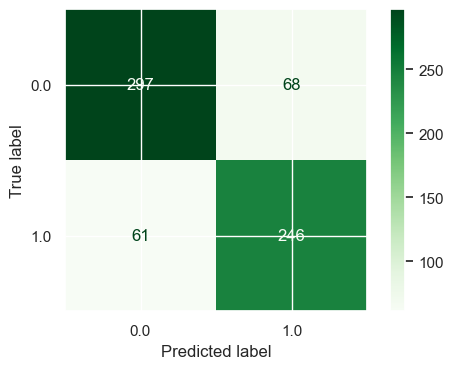

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators = 500, max_depth = 16)
model_gb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb = model_boilerplate(model_gb, X_train, y_train, X_test, y_test)